In [21]:
from varpz_core import VAR_PZ_Calculator
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the calculator (no arguments needed!)
varpz_calculator = VAR_PZ_Calculator()
print("✅ VAR-PZ Calculator initialized!")

✅ VAR-PZ Calculator initialized!


In [ ]:
# Load your light curve

lc_file = '35034_r_sdss_errors.csv'
lc = Table.read(lc_file, format='ascii.csv')

time = lc['t']
mag = lc['psMag']
mag_err = lc['psMagErr']

print(f"📊 Loaded light curve: {len(time)} data points")

📊 Loaded light curve: 300 data points


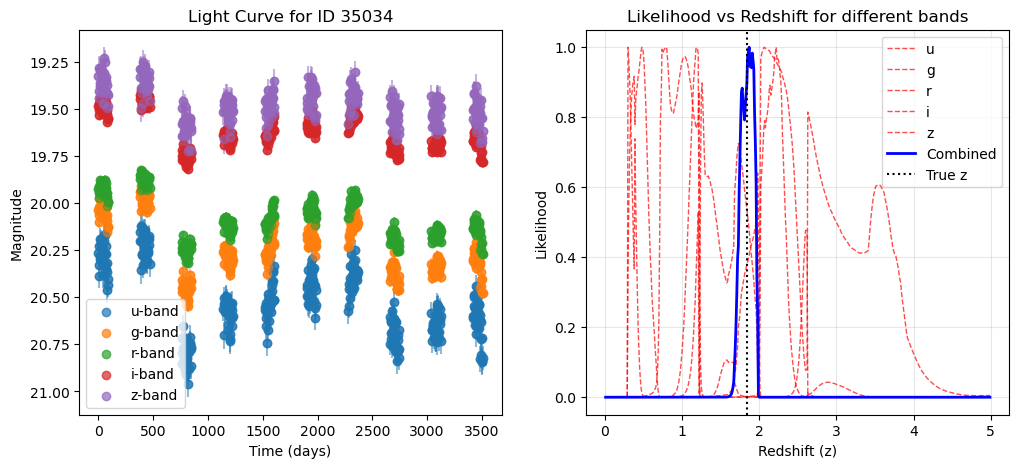

In [26]:
import warnings
warnings.filterwarnings('ignore') 

bands = ['u', 'g', 'r', 'i', 'z']  
lc_path = '../lc/'
colors = ['blue', 'green', 'red', 'orange', 'purple']
lamdas=[3543, 4770, 6231, 7625, 9134]  # Effective wavelengths for u, g, r, i, z bands in Angstroms
for i in range(0,1):
    id=LC_data['dbID'][i]
    fluxes = [LC_data['flux_u'][i], LC_data['flux_g'][i], LC_data['flux_r'][i], LC_data['flux_i'][i], LC_data['flux_z'][i]]
    flux_errors = [LC_data['flux_u_err'][i], LC_data['flux_g_err'][i], LC_data['flux_r_err'][i], LC_data['flux_i_err'][i], LC_data['flux_z_err'][i]]
    fig,ax=plt.subplots(1,2,figsize=(12, 5))
    combined_likelihoods = None
    for j,band in enumerate(bands):
        lc_file = os.path.join(lc_path, f"{id}_{band}_sdss_errors.csv")

        lc = Table.read(lc_file, format='ascii.csv')
        x, y, yerr = lc['t'], lc['psMag'], lc['psMagErr']
        ax[0].scatter(x, y, label=f'{band}-band', alpha=0.7)
        ax[0].errorbar(x, y, yerr=yerr, fmt='o', alpha=0.5)
        ax[0].invert_yaxis()
        ax[0].set_xlabel('Time (days)')
        ax[0].set_ylabel('Magnitude')
        ax[0].set_title(f'Light Curve for ID {id}')
        ax[0].legend()

        log_likelihoods, chi2_values, z_values = varpz_calculator.calculate_band_log_likelihood(
            time=time,
            mag=mag,
            mag_err=mag_err,
            wavelength=lamdas[j],
            fluxes=fluxes,
            flux_errors=flux_errors,
            survey='SDSS'
        )
        pdf=np.exp(log_likelihoods - np.nanmax(log_likelihoods))
        if combined_likelihoods is None:
            combined_likelihoods=pdf
        else:
            combined_likelihoods*=pdf

        ax[1].plot(z_values, pdf, 'r-', linewidth=1,ls='--',label=band,alpha=0.7)
    plt.plot(z_values, combined_likelihoods/np.max(combined_likelihoods), 'b-', linewidth=2,label='Combined')
    plt.axvline(x=LC_data['Redshift'][i], color='k', linestyle=':', label='True z')
    plt.xlabel('Redshift (z)')
    plt.ylabel('Likelihood')
    plt.title('Likelihood vs Redshift for different bands')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    